In [1]:
import urllib, json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['font.size'] = 20

In [2]:
jsonURL = "https://services.swpc.noaa.gov/json/solar-cycle/observed-solar-cycle-indices.json"
with urllib.request.urlopen(jsonURL) as url:
    dataJSON = json.load(url)
data = pd.DataFrame.from_dict(dataJSON)
data.head()

,time-tag,ssn,smoothed_ssn,observed_swpc_ssn,smoothed_swpc_ssn,f10.7,smoothed_f10.7
0,1749-01,96.7,-1.0,-1.0,-1.0,-1.0,-1.0
1,1749-02,104.3,-1.0,-1.0,-1.0,-1.0,-1.0
2,1749-03,116.7,-1.0,-1.0,-1.0,-1.0,-1.0
3,1749-04,92.8,-1.0,-1.0,-1.0,-1.0,-1.0
4,1749-05,141.7,-1.0,-1.0,-1.0,-1.0,-1.0


In [3]:
# Query data from yr 2000 onwards.
milDt = data[(data['time-tag']>="2012-01") & (data['time-tag']<='2023-11')]

In [5]:
dt = data.rename(columns={'time-tag': 'date'})
dt['date'] = pd.to_datetime(dt['date'], format='%Y-%m')
dt = dt.set_index('date')
# Fill potential gaps with Null
dt = dt.asfreq('MS')
dt = dt.sort_index()
dt.head()

,ssn,smoothed_ssn,observed_swpc_ssn,smoothed_swpc_ssn,f10.7,smoothed_f10.7
date,,,,,,
1749-01-01,96.7,-1.0,-1.0,-1.0,-1.0,-1.0
1749-02-01,104.3,-1.0,-1.0,-1.0,-1.0,-1.0
1749-03-01,116.7,-1.0,-1.0,-1.0,-1.0,-1.0
1749-04-01,92.8,-1.0,-1.0,-1.0,-1.0,-1.0
1749-05-01,141.7,-1.0,-1.0,-1.0,-1.0,-1.0


In [27]:
sunspot_data = dt['ssn']
fft_result = np.fft.fft(sunspot_data)
frequencies = np.fft.fftfreq(len(sunspot_data))

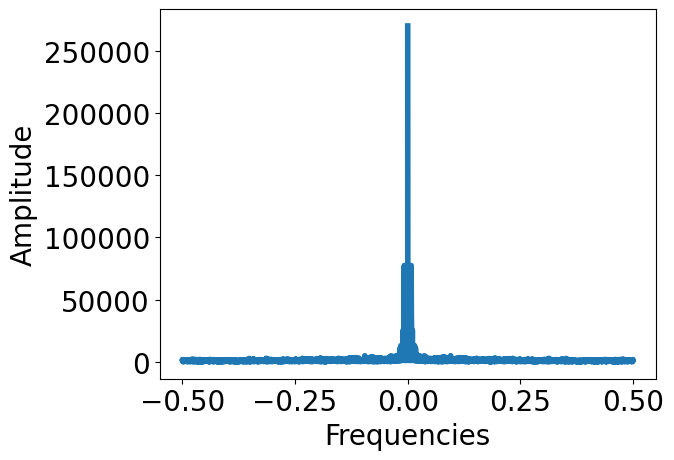

In [16]:
plt.figure()
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel('Frequencies'); plt.ylabel('Amplitude')
plt.show()

In [21]:
# Identify the peak frequency
peak_frequency = np.abs(frequencies[np.argmax(fft_result)])

# Calculate the period (inverse of frequency)
period = 1 / peak_frequency

# Zero out frequencies outside a certain range
fft_result_filtered = fft_result.copy()
threshold = 0.1
fft_result_filtered[np.abs(frequencies) > threshold] = 0

# Reconstruct the time series
sunspot_data_reconstructed = np.fft.ifft(fft_result_filtered)


C:\Users\Louie\AppData\Local\Temp\ipykernel_15896\4059091.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  period = 1 / peak_frequency


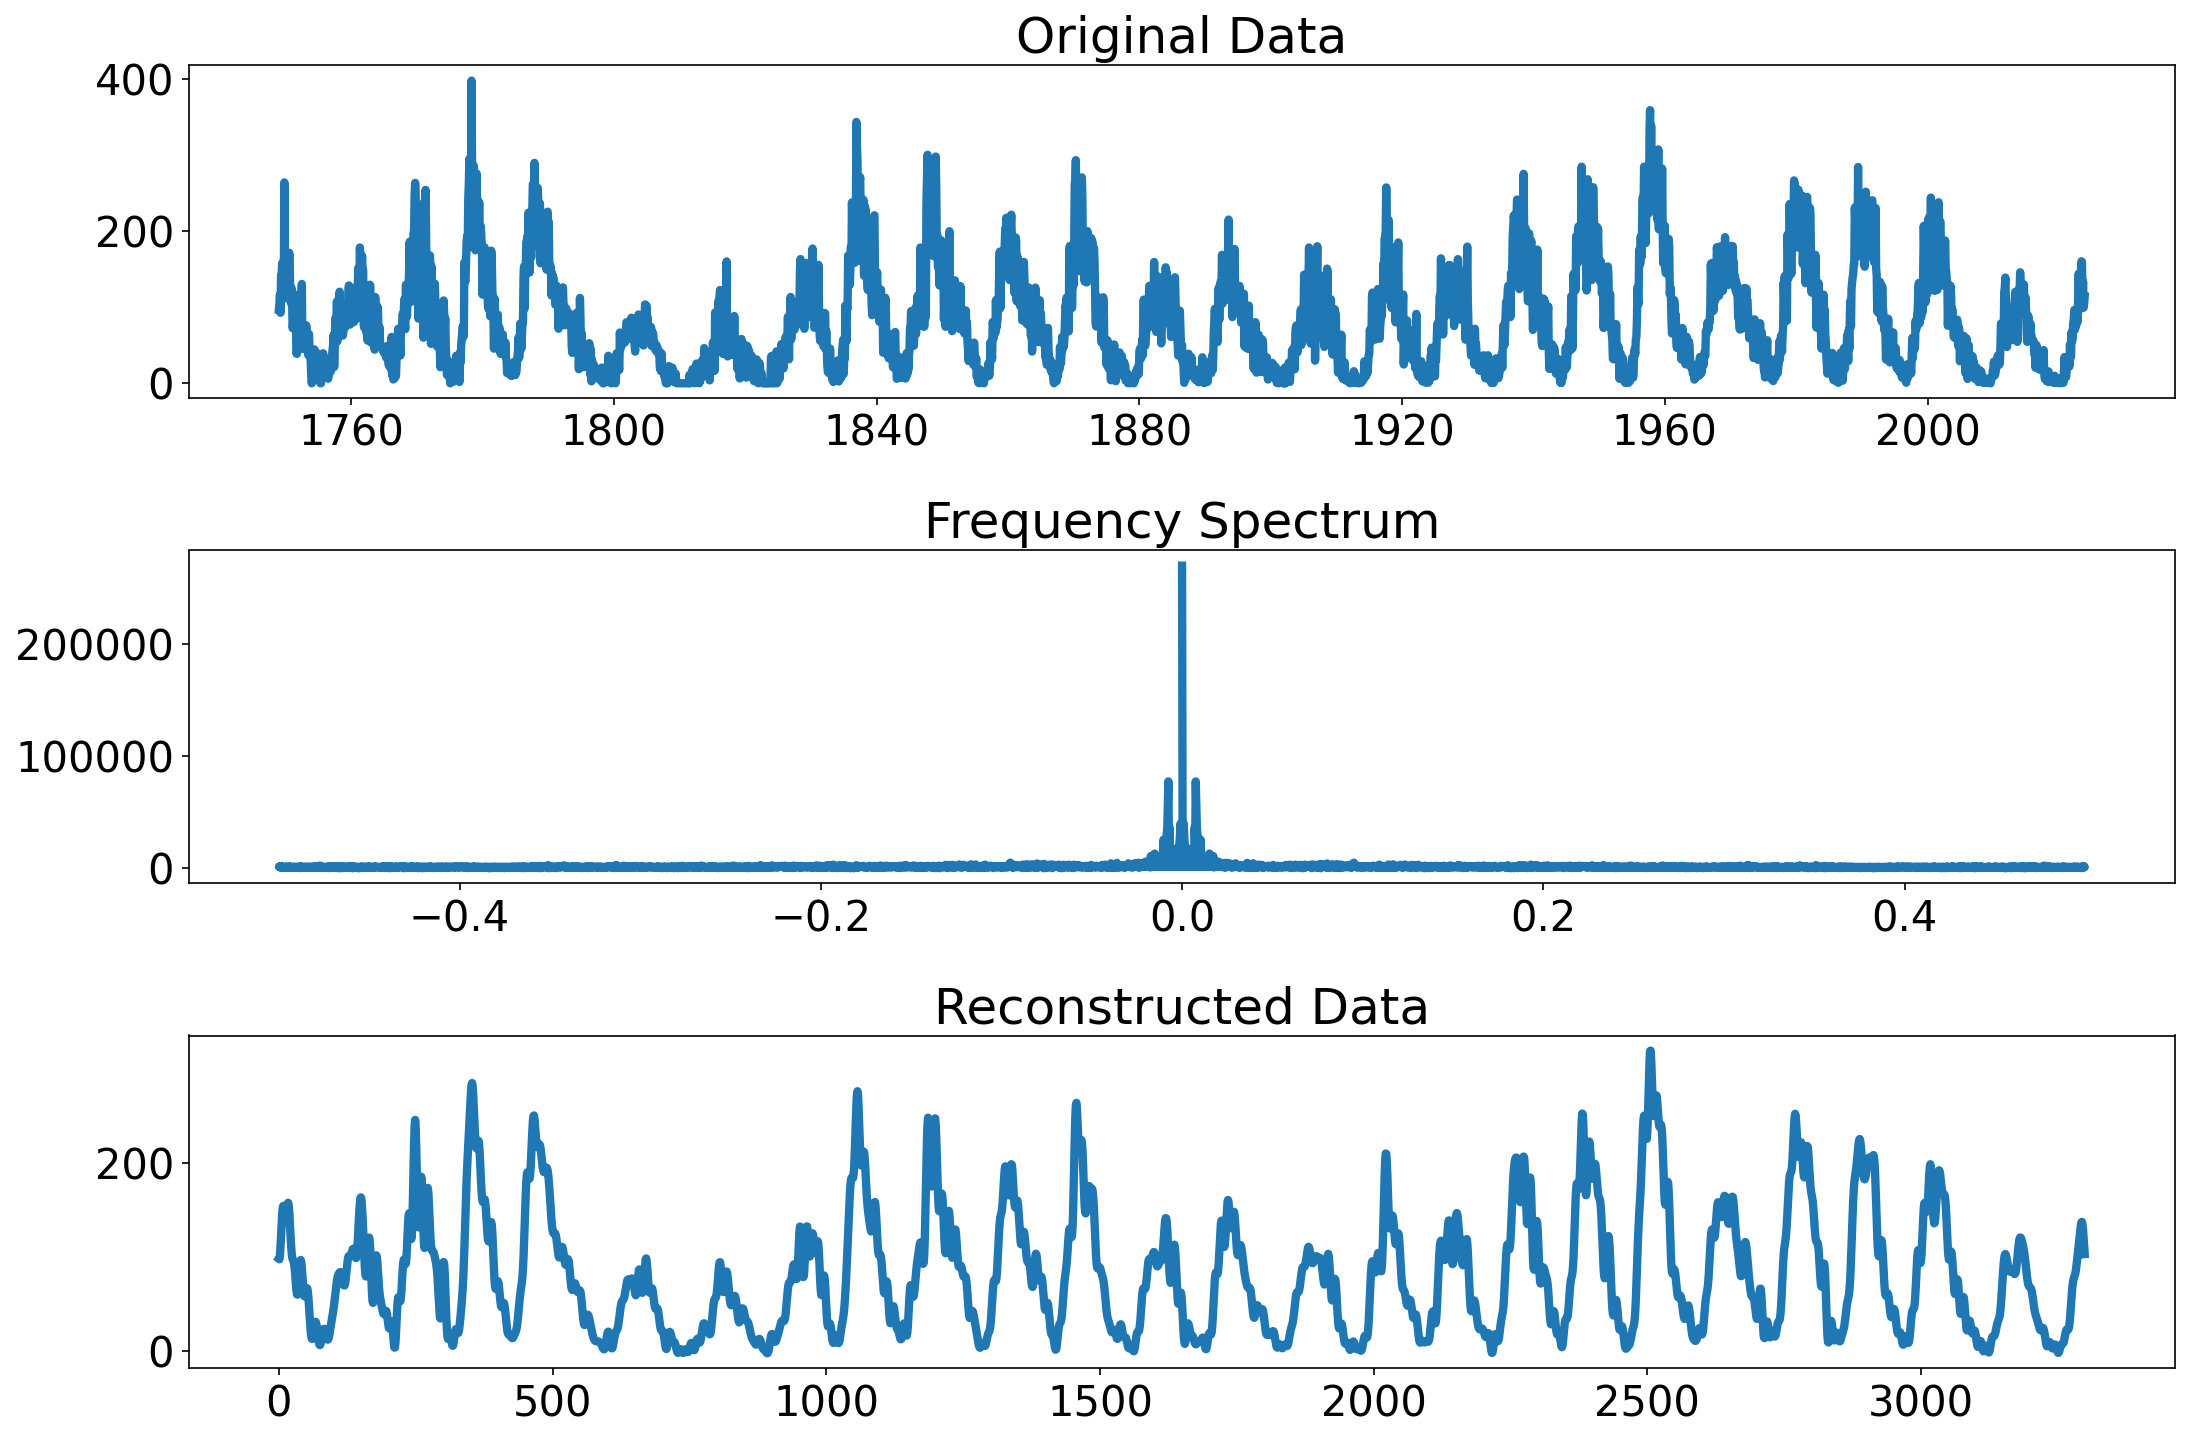

In [41]:
# Plot properties
x_width, y_width = 15, 10

# Create plot
fig, ax = plt.subplots(3,1, figsize=(x_width, y_width), dpi=150)

ax[0].plot(sunspot_data)
ax[0].set_title('Original Data')

ax[1].plot(frequencies, np.abs(fft_result))
ax[1].set_title('Frequency Spectrum')

ax[2].plot(np.real(sunspot_data_reconstructed))
ax[2].set_title('Reconstructed Data')

plt.tight_layout()
plt.show()
